In [1]:
!pip install PyPortfolioOpt



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pypfopt import EfficientFrontier, risk_models, expected_returns
from sklearn.preprocessing import StandardScaler

In [3]:
# -------------------------------
# Step 1: Load Data
# -------------------------------
# Daily returns data
returns = pd.read_csv("../data/processed/returns_data.csv", parse_dates=['Date'], index_col='Date')

# Load regime labels
regimes = pd.read_csv("../data/processed/regime_labels.csv", parse_dates=['Date'], index_col='Date')

# Join to align dates
data = returns.join(regimes, how='inner')

print("Data shape:", data.shape)
print(data.head())

Data shape: (2209, 8)
            NIFTY_IT  NIFTY_BANK  NIFTY_FMCG  NIFTY_PHARMA  NIFTY_AUTO  \
Date                                                                     
2015-04-21 -0.000329   -0.000387   -0.011537     -0.037536   -0.013630   
2015-04-22 -0.005761    0.007590    0.005336      0.011924   -0.000555   
2015-04-23 -0.003526    0.000104   -0.000628     -0.011187   -0.006239   
2015-04-27 -0.031369   -0.026547   -0.017798     -0.025028   -0.005626   
2015-04-28 -0.004059    0.026583   -0.009393      0.006395    0.023945   

            NIFTY_METAL  vol_regime  cluster_regime  
Date                                                 
2015-04-21     0.001657           2               1  
2015-04-22     0.005280           2               1  
2015-04-23     0.014513           2               1  
2015-04-27    -0.000346           2               1  
2015-04-28    -0.000346           2               1  


In [4]:
# -------------------------------
# Step 2: Compute baseline stats
# -------------------------------
# Annualize mean & covariance
mu = expected_returns.mean_historical_return(returns, frequency=252)
S = risk_models.sample_cov(returns, frequency=252)

print("Annualized mean returns:\n", mu)
print("\nAnnualized covariance matrix:\n", S)

Annualized mean returns:
 NIFTY_IT       NaN
NIFTY_BANK     NaN
NIFTY_FMCG     NaN
NIFTY_PHARMA   NaN
NIFTY_AUTO     NaN
NIFTY_METAL    NaN
dtype: float64

Annualized covariance matrix:
               NIFTY_IT    NIFTY_BANK    NIFTY_FMCG  NIFTY_PHARMA  NIFTY_AUTO  \
NIFTY_IT           NaN           NaN           NaN           NaN         NaN   
NIFTY_BANK         NaN  81007.679431  1.283803e+03           NaN         NaN   
NIFTY_FMCG         NaN   1283.803245  6.639530e+06           NaN         NaN   
NIFTY_PHARMA       NaN           NaN           NaN           NaN         NaN   
NIFTY_AUTO         NaN           NaN           NaN           NaN         NaN   
NIFTY_METAL        NaN           NaN           NaN           NaN         NaN   

              NIFTY_METAL  
NIFTY_IT              NaN  
NIFTY_BANK            NaN  
NIFTY_FMCG            NaN  
NIFTY_PHARMA          NaN  
NIFTY_AUTO            NaN  
NIFTY_METAL           NaN  


c:\Users\iamta\AppData\Local\Programs\Python\Python311\Lib\site-packages\pypfopt\expected_returns.py:36: UserWarning: Some returns are infinite. Please check your price data.
  warnings.warn(
c:\Users\iamta\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\_core\_methods.py:57: RuntimeWarning: invalid value encountered in reduce
  return umr_prod(a, axis, dtype, out, keepdims, initial, where)
c:\Users\iamta\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\_function_base_impl.py:2842: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


In [5]:
returns_data = pd.read_csv("../data/processed/returns_data.csv", index_col=0, parse_dates=True)


In [6]:
sector_cols = ['NIFTY_IT', 'NIFTY_BANK', 'NIFTY_FMCG', 'NIFTY_PHARMA', 'NIFTY_AUTO', 'NIFTY_METAL']

# Filter just these columns, ignoring regime labels
returns = returns_data[sector_cols].copy()

# Remove any residual NaN/inf
returns = returns.replace([np.inf, -np.inf], np.nan).dropna()

# Then compute
mean_returns = returns.mean() * 252
cov_matrix = returns.cov() * 252

print("Annualized mean returns:\n", mean_returns)
print("\nAnnualized covariance matrix:\n", cov_matrix)


Annualized mean returns:
 NIFTY_IT        0.397746
NIFTY_BANK      0.102249
NIFTY_FMCG      0.100012
NIFTY_PHARMA    0.085053
NIFTY_AUTO      0.103397
NIFTY_METAL     0.089474
dtype: float64

Annualized covariance matrix:
               NIFTY_IT  NIFTY_BANK  NIFTY_FMCG  NIFTY_PHARMA  NIFTY_AUTO  \
NIFTY_IT      0.589707   -0.004158    0.009820      0.014738    0.015580   
NIFTY_BANK   -0.004158    0.052851    0.018779      0.017797    0.035404   
NIFTY_FMCG    0.009820    0.018779    0.027361      0.014470    0.020143   
NIFTY_PHARMA  0.014738    0.017797    0.014470      0.039713    0.021409   
NIFTY_AUTO    0.015580    0.035404    0.020143      0.021409    0.049543   
NIFTY_METAL   0.023212    0.038911    0.020398      0.026546    0.041032   

              NIFTY_METAL  
NIFTY_IT         0.023212  
NIFTY_BANK       0.038911  
NIFTY_FMCG       0.020398  
NIFTY_PHARMA     0.026546  
NIFTY_AUTO       0.041032  
NIFTY_METAL      0.082664  


Optimal Weights:
NIFTY_IT: 0.1819
NIFTY_BANK: 0.2235
NIFTY_FMCG: 0.5312
NIFTY_PHARMA: 0.0634
NIFTY_AUTO: 0.0000
NIFTY_METAL: 0.0000

Expected annual return: 15.37%
Expected annual volatility: 19.46%
Expected Sharpe ratio: 0.64


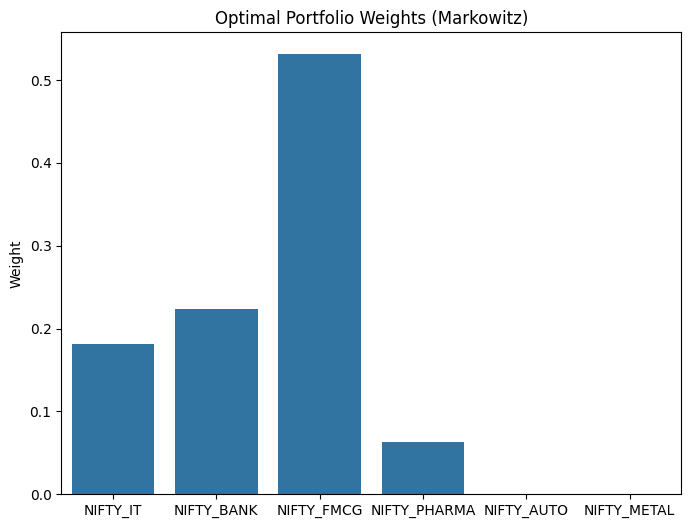

In [7]:
from scipy.optimize import minimize

# Step 3.1: Define objective functions
def portfolio_performance(weights, mean_returns, cov_matrix, risk_free_rate=0.03):
    returns = np.dot(weights, mean_returns)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sharpe = (returns - risk_free_rate) / volatility
    return returns, volatility, sharpe

def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate=0.03):
    return -portfolio_performance(weights, mean_returns, cov_matrix, risk_free_rate)[2]

# Step 3.2: Constraints and bounds
num_assets = len(mean_returns)
args = (mean_returns, cov_matrix)
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bounds = tuple((0, 1) for asset in range(num_assets))

# Step 3.3: Initial guess
initial_guess = num_assets * [1. / num_assets]

# Step 3.4: Optimize
optimized = minimize(neg_sharpe_ratio, initial_guess, args=args,
                     method='SLSQP', bounds=bounds, constraints=constraints)

optimal_weights = optimized.x
expected_return, expected_volatility, expected_sharpe = portfolio_performance(optimal_weights, mean_returns, cov_matrix)

# Step 3.5: Show results
print("Optimal Weights:")
for i, w in enumerate(optimal_weights):
    print(f"{sector_cols[i]}: {w:.4f}")
    
print(f"\nExpected annual return: {expected_return:.2%}")
print(f"Expected annual volatility: {expected_volatility:.2%}")
print(f"Expected Sharpe ratio: {expected_sharpe:.2f}")

# Step 3.6: Plot
plt.figure(figsize=(8,6))
sns.barplot(x=sector_cols, y=optimal_weights)
plt.title("Optimal Portfolio Weights (Markowitz)")
plt.ylabel("Weight")
plt.show()


In [8]:
unique_regimes = data['vol_regime'].unique()
regime_results = {}

for regime in unique_regimes:
    print(f"\n--- Regime {regime} ---")
    regime_data = data[data['vol_regime'] == regime][sector_cols]
    
    mean_r = regime_data.mean() * 252
    cov_r = regime_data.cov() * 252
    
    # Store
    regime_results[regime] = {'mean_returns': mean_r, 'cov_matrix': cov_r}
    
    print(f"Annualized mean returns:\n{mean_r}\n")
    print(f"Annualized covariance matrix:\n{cov_r}\n")



--- Regime 2 ---
Annualized mean returns:
NIFTY_IT        0.978702
NIFTY_BANK      0.087623
NIFTY_FMCG      0.115293
NIFTY_PHARMA    0.125161
NIFTY_AUTO      0.267286
NIFTY_METAL     0.250355
dtype: float64

Annualized covariance matrix:
              NIFTY_IT  NIFTY_BANK  NIFTY_FMCG  NIFTY_PHARMA  NIFTY_AUTO  \
NIFTY_IT      1.718317   -0.024730    0.019321      0.030681    0.031378   
NIFTY_BANK   -0.024730    0.114570    0.042429      0.036501    0.079219   
NIFTY_FMCG    0.019321    0.042429    0.045063      0.029707    0.041793   
NIFTY_PHARMA  0.030681    0.036501    0.029707      0.059406    0.039303   
NIFTY_AUTO    0.031378    0.079219    0.041793      0.039303    0.094256   
NIFTY_METAL   0.048784    0.081881    0.042183      0.047351    0.078623   

              NIFTY_METAL  
NIFTY_IT         0.048784  
NIFTY_BANK       0.081881  
NIFTY_FMCG       0.042183  
NIFTY_PHARMA     0.047351  
NIFTY_AUTO       0.078623  
NIFTY_METAL      0.137440  


--- Regime 1 ---
Annualized me

In [9]:
from pypfopt import EfficientFrontier

regime_weights = {}

for regime in unique_regimes:
    mu = regime_results[regime]['mean_returns']
    S = regime_results[regime]['cov_matrix']

    ef = EfficientFrontier(mu, S)
    weights = ef.max_sharpe()
    cleaned_weights = ef.clean_weights()
    regime_weights[regime] = cleaned_weights


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\iamta\\Downloads\\quant-entropy-rotation\\results\\plots\\regime_optimal_weights.png'

<Figure size 1000x600 with 0 Axes>

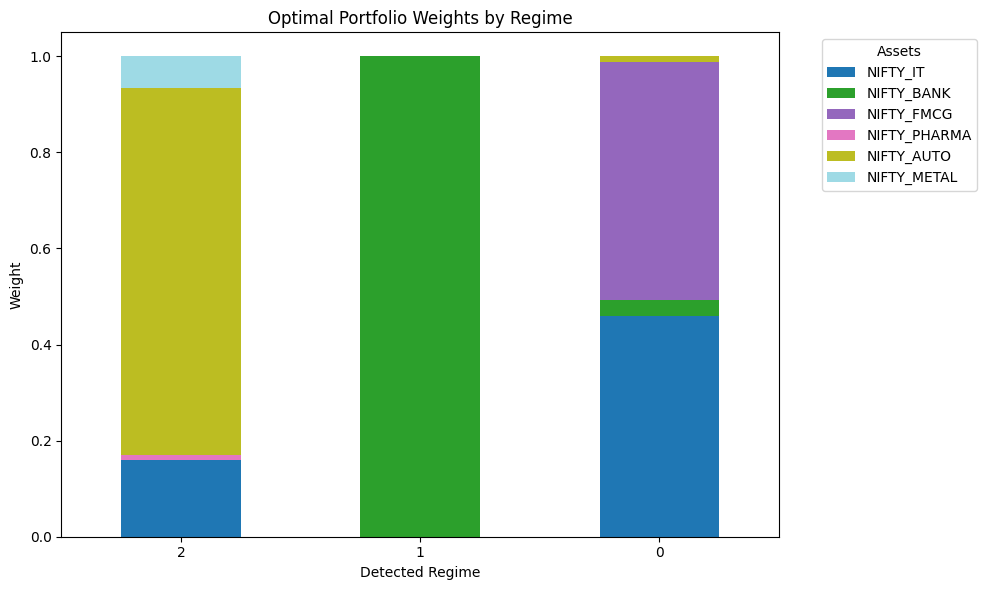

In [10]:
import matplotlib.pyplot as plt

# Assume you have:
# - regime_weights: dict with regime -> {ticker: weight, ...}
# - asset_names: list of asset names in the same order as the weights

asset_names = list(regime_weights[list(regime_weights.keys())[0]].keys())

# Convert to DataFrame for easier plotting
import pandas as pd
weights_df = pd.DataFrame(regime_weights).T  # regimes as index, assets as columns

# Plot
plt.figure(figsize=(10,6))
weights_df.plot(kind='bar', stacked=True, figsize=(10,6), colormap='tab20')
plt.title('Optimal Portfolio Weights by Regime')
plt.ylabel('Weight')
plt.xlabel('Detected Regime')
plt.xticks(rotation=0)
plt.legend(title='Assets', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Optionally save
plt.savefig("../results/plots/regime_optimal_weights.png")

plt.show()


✅ Perfect — that’s exactly what we needed!
You now have regime-specific expected returns & covariances, which means:

We can run the Markowitz optimizer (or Black-Litterman later) inside each regime.

Compare: how does the optimal portfolio differ when the market is calm (Regime 0), moderate (Regime 1), or highly volatile/speculative (Regime 2)?
This is central to your entropy-augmented adaptive portfolio idea.

In [11]:
from pypfopt import EfficientFrontier

# Find unique regimes
unique_regimes = data['cluster_regime'].unique()
sector_cols = ['NIFTY_IT', 'NIFTY_BANK', 'NIFTY_FMCG', 'NIFTY_PHARMA', 'NIFTY_AUTO', 'NIFTY_METAL']

regime_results = {}

for regime in unique_regimes:
    print(f"\n--- Regime {regime} ---")
    subset = data[data['cluster_regime'] == regime]
    
    # Recalculate annualized mean returns & cov matrix
    mean_returns = subset[sector_cols].mean() * 252
    cov_matrix = subset[sector_cols].cov() * 252
    
    # Markowitz optimizer
    ef = EfficientFrontier(mean_returns, cov_matrix)
    weights = ef.max_sharpe()
    cleaned_weights = ef.clean_weights()
    
    expected_annual_return, annual_volatility, sharpe_ratio = ef.portfolio_performance()
    
    print(f"Optimal Weights: {cleaned_weights}")
    print(f"Expected annual return: {expected_annual_return:.2%}")
    print(f"Annual volatility: {annual_volatility:.2%}")
    print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
    
    regime_results[regime] = {
        "weights": cleaned_weights,
        "return": expected_annual_return,
        "volatility": annual_volatility,
        "sharpe": sharpe_ratio
    }



--- Regime 1 ---
Optimal Weights: OrderedDict([('NIFTY_IT', 0.33902), ('NIFTY_BANK', 0.43637), ('NIFTY_FMCG', 0.22461), ('NIFTY_PHARMA', 0.0), ('NIFTY_AUTO', 0.0), ('NIFTY_METAL', 0.0)])
Expected annual return: 10.12%
Annual volatility: 11.83%
Sharpe Ratio: 0.86

--- Regime 0 ---
Optimal Weights: OrderedDict([('NIFTY_IT', 0.3544), ('NIFTY_BANK', 0.0), ('NIFTY_FMCG', 0.28267), ('NIFTY_PHARMA', 0.22169), ('NIFTY_AUTO', 0.0), ('NIFTY_METAL', 0.14124)])
Expected annual return: 26.82%
Annual volatility: 24.03%
Sharpe Ratio: 1.12

--- Regime 2 ---
Optimal Weights: OrderedDict([('NIFTY_IT', 0.01905), ('NIFTY_BANK', 0.0), ('NIFTY_FMCG', 0.1384), ('NIFTY_PHARMA', 0.0), ('NIFTY_AUTO', 0.84255), ('NIFTY_METAL', 0.0)])
Expected annual return: 93.81%
Annual volatility: 14.59%
Sharpe Ratio: 6.43


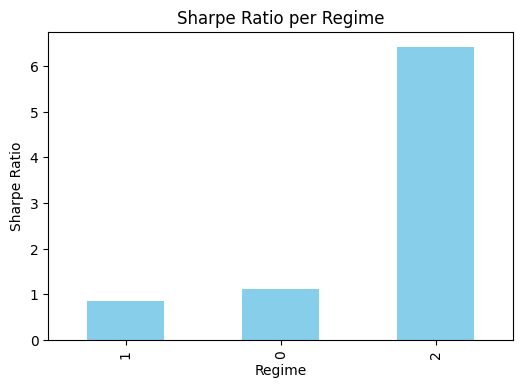

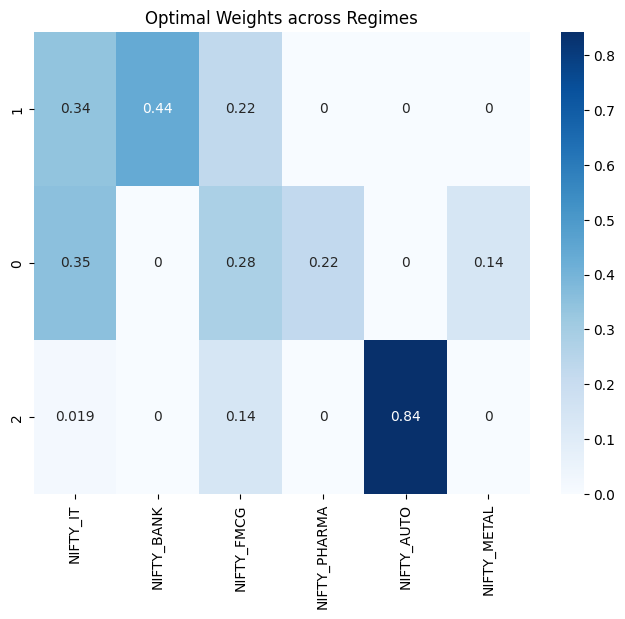

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert regime_results to DataFrame for plotting
results_df = pd.DataFrame({
    regime: {
        'Return': v['return'],
        'Volatility': v['volatility'],
        'Sharpe': v['sharpe'],
        **v['weights']
    }
    for regime, v in regime_results.items()
}).T

# Plot Sharpe ratio across regimes
plt.figure(figsize=(6,4))
results_df['Sharpe'].plot(kind='bar', color='skyblue')
plt.title("Sharpe Ratio per Regime")
plt.ylabel("Sharpe Ratio")
plt.xlabel("Regime")
plt.show()

# Plot allocation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(results_df[sector_cols], annot=True, cmap='Blues')
plt.title("Optimal Weights across Regimes")
plt.show()
